In [1]:
# 알고리즘 : DecisionTree 트리모델
### 미션 : 트리 모델 계열의 근간인 결정 트리를 학습시켜 연봉을 예측하자. 
### 종속 변수 : class(연봉등급)
### 평가 지표 : 정확도
### 문제 유형 : 분류(classification)

지도학습 알고리즘 5
DecisionTree 트리모델
학습 순서
1. 문제정의 -> 2. 라이브러리 및 데이터 불러오기/확인하기 -> 3. 전처리 a. 범주형 데이터 b. 결측치 처리 및 더미 변수 변환 -> 4. 데이터 모델링 및 예측하기 -> 5. 이해하기 (결정트리)

정의 : 관측값과 목푯값을 연결시켜주는 예측 모델로 데이터를 나무모양으로 분류.
    - 트리 기반 모델의 기본이며, 트리메들은 선형 모델과는 다른 특징을 가진다.
    - 선형 모델은 각 변수에 대한 기울기 값들을 최적화 하여 모델을 만들어 가지만
    - 트리 모델은 각 변수의 특정 지점을 기준으로 데이터를 분류해 가며 예측 하는 모델.
장점 : 데이터에 대한 가정이 없는 모델 (NonParametric Model)예를 들어 선형 모델은 정규분포에 대한 가정이나 독립변수와 종석변수ㅡ의 선형 관계 등을 가정하는 모델이지만.
    - 결정 트리는 데이터에 대한 가정 없이 자유롭게 
단점 : 트리가 무한정 깊어지면 오버피팅
    - 앞으로 배울 발전된 트리 기반 모델들에 비하면 예측력이 상당히 떨어진다. 

유용한 곳 : 1. 종속변수가 연속형 데이터와 범주형 데이터 모두에 사용할수 있다
          2. 모델링 결과를 시각화 할 목적으로 가장 유용
          3. 아웃라이어가 문제될 정도로 많을 때 선형 모델보다 좋은 대안


***예측력과 설명력***
- 예측력이란 모델 학습을 통해 얼마나 좋은 예측을 보여주었는가.
- 설명력은 학습된 모델을 얼마나 쉽게 해석할 수 있는지
- 알고리즘이 복잡홰질수록 예측력 올라가지만, 설명력이 떨어지는 반비례.
- 결정트리와 회귀분석은 상대적으로 해석이 쉬워 설명력이 높다. 
- 이후로 나올 알고리즘 복잡도가 증가하지만 예측력이 높음. 

8.2 라이브러리 및 데이터 불러오기, 데이터 확인하기

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_url = 'https://media.githubusercontent.com/media/musthave-ML10/data_source/main/salary.csv'
data = pd.read_csv(file_url, skipinitialspace = True) #skipinitialsplace는 각 데이터의 첫 자리에 있는 공란 자동 제거(이번 데이터가 좀 공란이 있음)

In [3]:
data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
data["class"].unique()

array(['<=50K', '>50K'], dtype=object)

In [6]:
data.info()

#object형, 즉 테스트로 구성된 범주형 변수가 많다. 
#결측치도 몇개 있고. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       46043 non-null  object
 2   education       48842 non-null  object
 3   education-num   48842 non-null  int64 
 4   marital-status  48842 non-null  object
 5   occupation      46033 non-null  object
 6   relationship    48842 non-null  object
 7   race            48842 non-null  object
 8   sex             48842 non-null  object
 9   capital-gain    48842 non-null  int64 
 10  capital-loss    48842 non-null  int64 
 11  hours-per-week  48842 non-null  int64 
 12  native-country  47985 non-null  object
 13  class           48842 non-null  object
dtypes: int64(5), object(9)
memory usage: 5.2+ MB


- age = 연령
- workclass = 고용형태
- education = 학력
- education-num = 교육연수 등급
- marital- status = 혼인상태
- occupation = 직업
- relationship = 가족관계
- rece = 인종
- sex = 성별
- capital-gain = 자산증가
- capital-loss = 자산감소 
- hours per week= 주당노동시간
- native country = 본국
- class = 연봉구분


In [7]:
data.describe()
#object 형 제외 하고 통계적 수치만 보여줌. 

,age,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,10.078089,1079.067626,87.502314,40.422382
std,13.710510,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [8]:
data.describe(include = 'all')
# object형도 다 보여주게 하는거 
# 항목이 추가된다. 
# *unqiue = 변수에서 가지고 있는 고유 value의 숫자. 즉, nunique()
# *top = 각 변수별로 가장 많이 등장하는 value
# *freq = top 에 나온 value 의 갯수

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
count,48842.000000,46043,48842,48842.000000,48842,46033,48842,48842,48842,48842.000000,48842.000000,48842.000000,47985,48842
unique,NaN,8,16,NaN,7,14,6,5,2,NaN,NaN,NaN,41,2
top,NaN,Private,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,33906,15784,NaN,22379,6172,19716,41762,32650,NaN,NaN,NaN,43832,37155
mean,38.643585,NaN,NaN,10.078089,NaN,NaN,NaN,NaN,NaN,1079.067626,87.502314,40.422382,NaN,NaN
std,13.710510,NaN,NaN,2.570973,NaN,NaN,NaN,NaN,NaN,7452.019058,403.004552,12.391444,NaN,NaN
min,17.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


8.3 전처리 : 범주형 데이터

In [9]:
# 50k 이하를 0, 초과를 1
data['class'] = data['class'].map({'<=50K': 0, '>50K': 1})

In [10]:
# object 형의 변수 정보 확인하기. 
data['age'].dtype

dtype('int64')

In [11]:
for i in data.columns: 
    print(i, data[i].dtype)

age int64
workclass object
education object
education-num int64
marital-status object
occupation object
relationship object
race object
sex object
capital-gain int64
capital-loss int64
hours-per-week int64
native-country object
class int64


In [18]:
#object 형 변수 이름들을 별도의 리스트로 모으기
obj_list = []
for i in data.columns:
    if data[i].dtype == 'object':
        obj_list.append(i)

In [19]:
obj_list

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country']

In [21]:
#전처리할 변수 선별하기
for i in obj_list:
    print(i, data[i].nunique())

workclass 8
education 16
marital-status 7
occupation 14
relationship 6
race 5
sex 2
native-country 41


범주형 변수를 다룰 때는 더미변수로 바꾸어서 활용한다.
하지만 더미변수 사용하면, 그만큼 새로운 변수들이 늘어나서, 너무 많은 value종류값이 그만큼 늘어나니까,, 감수해야하면 하고///

- 이 예제에서는 값 종류가 10개 미만인 변수는 그대로 / 이상인 변수만 확인하여 조치

In [23]:
for i in obj_list:
    if data[i].nunique() >= 10:
        print(i, data[i].nunique())

education 16
occupation 14
native-country 41


- education 변수 처리

In [24]:
data['education'].value_counts()

#범주형 변수 변환할때 더미변수와 원핫 인코딩 했었는데.
# 이경우는 서열이 명백하기 때문에 숫자로 바꾸어도 문제가 없다. 이 때 map() 함수로 쓴다. 
# 이번 케이스는 공교롭게 해당 데이터 변수가 이미 준비 되어 있음 (education-num)

HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64

In [25]:
np.sort(data['education-num'].unique())

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

In [26]:
# 1에 대한 매핑을 확인. 

data['education-num'] == 1

0        False
1        False
2        False
3        False
4        False
         ...  
48837    False
48838    False
48839    False
48840    False
48841    False
Name: education-num, Length: 48842, dtype: bool

In [27]:
# 1인 애들 불러와
data[data['education-num'] == 1]
# 음.. preschool이네. 

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
779,64,Private,Preschool,1,Married-civ-spouse,Handlers-cleaners,Husband,Asian-Pac-Islander,Male,0,0,40,Philippines,0
818,21,Private,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,25,Mexico,0
1029,57,NaN,Preschool,1,Separated,NaN,Not-in-family,White,Male,0,0,40,United-States,0
1059,31,Private,Preschool,1,Never-married,Handlers-cleaners,Not-in-family,Amer-Indian-Eskimo,Male,0,0,25,United-States,0
1489,19,Private,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,36,Mexico,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48079,31,State-gov,Preschool,1,Never-married,Other-service,Not-in-family,White,Male,0,0,24,United-States,0
48316,40,Private,Preschool,1,Married-civ-spouse,Other-service,Husband,White,Male,0,1672,40,Mexico,0
48505,40,Private,Preschool,1,Never-married,Other-service,Not-in-family,White,Female,0,0,20,United-States,0
48640,46,Private,Preschool,1,Married-civ-spouse,Machine-op-inspct,Other-relative,Black,Male,0,0,75,Dominican-Republic,0


In [28]:
# education-num이 1인 데이터들의 education고윳값 확인
data[data['education-num'] == 1]['education'].unique()

array(['Preschool'], dtype=object)

In [29]:
for i in np.sort(data['education-num'].unique()):
    print(i, data[data['education-num'] == i]['education'].unique())

#학력이 낮은 순부터 고학력으로 숫자가 올라감

1 ['Preschool']
2 ['1st-4th']
3 ['5th-6th']
4 ['7th-8th']
5 ['9th']
6 ['10th']
7 ['11th']
8 ['12th']
9 ['HS-grad']
10 ['Some-college']
11 ['Assoc-voc']
12 ['Assoc-acdm']
13 ['Bachelors']
14 ['Masters']
15 ['Prof-school']
16 ['Doctorate']


In [30]:
data.drop('education', axis=1, inplace= True)

- occupation 변수 처리

In [31]:
data['occupation'].value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

- naive-country 변수 처리

In [32]:
data['native-country'].value_counts()

United-States                 43832
Mexico                          951
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                             46
Ecuador                     

groupby() : 괄호 안에 묶어줄 변수 이름을 넣음. 그리고 반드시 그 뒤에 추가 연산자 ex) sum(), mean(), std()

In [34]:
data.groupby('native-country').mean().sort_values('class')
#그룹별 평균 계산 후 class기준으로 오름차순

/var/folders/h1/6sllxx6j0zb6l_hvj_9ys3qh0000gn/T/ipykernel_11735/2294238699.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby('native-country').mean().sort_values('class')


,age,education-num,capital-gain,capital-loss,hours-per-week,class
native-country,,,,,,
Holand-Netherlands,32.000000,10.000000,0.000000,2205.000000,40.000000,0.000000
Guatemala,32.090909,6.306818,167.875000,18.113636,38.715909,0.034091
Outlying-US(Guam-USVI-etc),38.826087,10.043478,0.000000,76.608696,41.347826,0.043478
Columbia,39.458824,9.258824,125.364706,65.247059,39.929412,0.047059
Dominican-Republic,37.970874,7.320388,1064.456311,39.029126,41.621359,0.048544
Mexico,33.635121,6.026288,415.954784,32.656151,40.213460,0.049422
Nicaragua,36.285714,9.000000,138.653061,69.938776,36.938776,0.061224
El-Salvador,33.380645,6.722581,392.761290,36.367742,36.361290,0.070968
Trinadad&Tobago,39.259259,8.962963,116.185185,156.518519,38.888889,0.074074


In [35]:
#이렇게 범주형 데이터가 많은 경우. 무작정 숫자로 치환하고나, 값들의 차이가 많이나는데 여러나라를 그룹화 해버리거나 하면 좋지 않다. 
# 이때 트리기반의 모델을 사용. 연속된 숫자들도 연속적으로 받아들이기보다 일정 구간을 나누어 받아들이기 때문에 트리가 충분히 깊어지면 범주형 변수를 숫자로 바꿔도 이상없어. 

In [36]:
country_group = data.groupby('native-country').mean()['class']

/var/folders/h1/6sllxx6j0zb6l_hvj_9ys3qh0000gn/T/ipykernel_11735/700274110.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  country_group = data.groupby('native-country').mean()['class']


In [37]:
country_group 

native-country
Cambodia                      0.321429
Canada                        0.346154
China                         0.295082
Columbia                      0.047059
Cuba                          0.246377
Dominican-Republic            0.048544
Ecuador                       0.133333
El-Salvador                   0.070968
England                       0.370079
France                        0.421053
Germany                       0.281553
Greece                        0.367347
Guatemala                     0.034091
Haiti                         0.120000
Holand-Netherlands            0.000000
Honduras                      0.100000
Hong                          0.266667
Hungary                       0.315789
India                         0.410596
Iran                          0.372881
Ireland                       0.297297
Italy                         0.323810
Jamaica                       0.141509
Japan                         0.347826
Laos                          0.086957
Mexico    

In [38]:
#reset_index : 판다스 데이터 프레임과 시리즈에서 인덱스에 들어 있는 정보를 별도의 변수로 빼온다.
country_group = country_group.reset_index()

In [39]:
country_group

,native-country,class
0,Cambodia,0.321429
1,Canada,0.346154
2,China,0.295082
3,Columbia,0.047059
4,Cuba,0.246377
5,Dominican-Republic,0.048544
6,Ecuador,0.133333
7,El-Salvador,0.070968
8,England,0.370079
9,France,0.421053


In [40]:
#merge() : 두 데이터프레임을 하나로 이어주는 함수

data = data.merge(country_group, on = 'native-country', how='left')

In [41]:
data
# class라는 변수가 있어서 자동으로 판다스가 class_x, class_y라고 변수 만들었음. 
# class_y를 국가명 대신 사용해줄 것이기 때문에 기존 native-country삭제 하고
# class_y를 native-country 로 변경
# class_x를 class로 변경

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class_x,class_y
0,25,Private,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0,0.243977
1,38,Private,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0,0.243977
2,28,Local-gov,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1,0.243977
3,44,Private,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1,0.243977
4,18,NaN,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,0,0.243977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0,0.243977
48838,40,Private,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1,0.243977
48839,58,Private,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0,0.243977
48840,22,Private,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0,0.243977


In [43]:
data.drop('native-country', axis=1, inplace=True)
data = data.rename(columns= {'class_x': 'class', 'class_y': 'native-country'})

8.4 전처리 : 결측치 처리 및 더미 변수 변환

In [44]:
data.isna().mean()

age               0.000000
workclass         0.057307
education-num     0.000000
marital-status    0.000000
occupation        0.057512
relationship      0.000000
race              0.000000
sex               0.000000
capital-gain      0.000000
capital-loss      0.000000
hours-per-week    0.000000
class             0.000000
native-country    0.017546
dtype: float64

보통 결측치를 숫자로 채워줄 때 -9나 -99와 같은 임의의 숫자를 사용한다. 
다만, 선형 모델에서는 데이터의 왜곡을 불러오니 주의해야한다. 


In [45]:
data['native-country'] = data['native-country'].fillna(-99)

In [46]:
#workclass 와 occupation 변수는 모두 범주형 변수이기 때문에 평균치로 해결 할 수 없다
#그래서 확인 절차 필요
data['workclass'].value_counts()
#work class의 경우 private의 비율이 압도적임. 이런경우 결측치를 private으로 진행

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [47]:
data['occupation'].value_counts()
# 아무것도 압도적이지 않으니까 그냥 "unknown"으로 채우자

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [48]:
data['occupation'] = data['occupation'].fillna('Unknown')

In [49]:
data = pd.get_dummies(data, drop_first=True)

8.5 모델링 및 평가하기

In [50]:
#비교적 데이터가 크기 때문에 test size를 0.4
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop('class', axis=1), data['class'], test_size = 0.4, random_state = 100)

- 결정 트리 모델은 사이킷 런의 tree에서 불러오는데, 분석목적에 따라 연속형 변수를 위한 
- DecisionTreeRegressor와 범주형 변수를 위한 DecisionTreeClassifier로 나뉜다. 
- DecisionTreeRegressor : 회귀모델은 연속형 변수용. 예) 엔드트리 값이 집단의 평균
- DecisionTreeClassifier : 분류모델은 범주형 변수용. 예) 엔드트리 값이 소속 집단 명

In [52]:
#우리는 0과 1을 예측해야하므로 분류형 선택
from sklearn.tree import DecisionTreeClassifier

In [53]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
pred = model.predict(X_test)

In [54]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.8168091313917183

# 분류 결정 트리
- DecisionTreeClassifier는 각 노드의 순도가 가장 높은 방향으로 분류한다. 
- 순도는 한 노드 안에 여러종류가 아닌 한 종류의 목푯값만 있는 상태에 대한 지표이다. 
- 예를들어 한 노드안에 사과3개와 복숭아 3개가 있으면 순도가 낮은거고, 사과3개만 있으면 순도가 높은 것
- 이 순도를 평가하는 지표는 1. 지니인덱스(Gini Index) 2. 엔트로피(Cross Entropy)가 있다. 딱히 뭐가 좋고는 없고 싸이킷런은 지니 인덱스를 기본 값

## 지니인덱스
지니 익덱스는 각 노드에 대해서 계산. p는 노드 안에 특정 아이템의 비율. 
- 예를들어 사과2, 복숭아2 이면 0.5^2 + 0.5^2 = 0.5  //  1 - 0.5 = 0.5
- 예를들어 사과1, 복숭아3 이면 0.25^2 + 0.75^2 = 0.625  // 1 - 0.625 = 0.375
- 예를들어 사과0, 복숭아4 이면 0^2 + 1^2 = 1  //  1 - 1 = 0

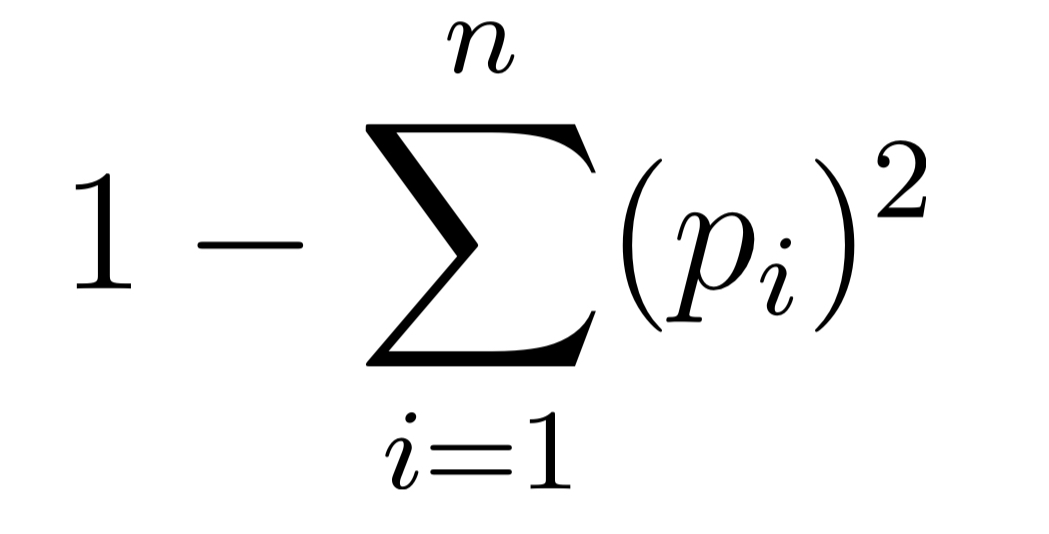

In [56]:
from IPython.display import Image
Image('images/17.jpeg')

## 교차 엔트로피
예를들어 사과2, 복숭아2 이면 
- 사과 50% -> 0.5 x Log2(0.5) = 0.5 x -1 = -0.5
- 복숭아 50% -> 0.5 x Log2(0.5) = 0.5 x -1 = -0.5
- 시그마는 위 두부분에 대한 합 -0.5 + -0.5 = -1
- 마지막으로 맨 앞의 - 부호를 반영하여 교차 엔트로피는 1

예를들어 사과1, 복숭아3 이면 
- 사과 25% -> 0.25 x Log2(0.25) = 0.25 x -2 = -0.5
- 복숭아 75% -> 0.75 x Log2(0.75) = 0.75 x -.415037 = -0.31
- 시그마는 위 두부분에 대한 합 -0.5 + -0.31 = -0.81
- 마지막으로 맨 앞의 - 부호를 반영하여 교차 엔트로피는 0.81

예를들어 사과0, 복숭아4 이면 
- 사과 0% -> 0 x Log2(0) = 0
- 복숭아 100% -> 1 x Log2(1) = 1 x 0 = 0
- 시그마는 위 두부분에 대한 합 0 + 0  = 0
- 마지막으로 맨 앞의 - 부호를 반영하여 교차 엔트로피는 0

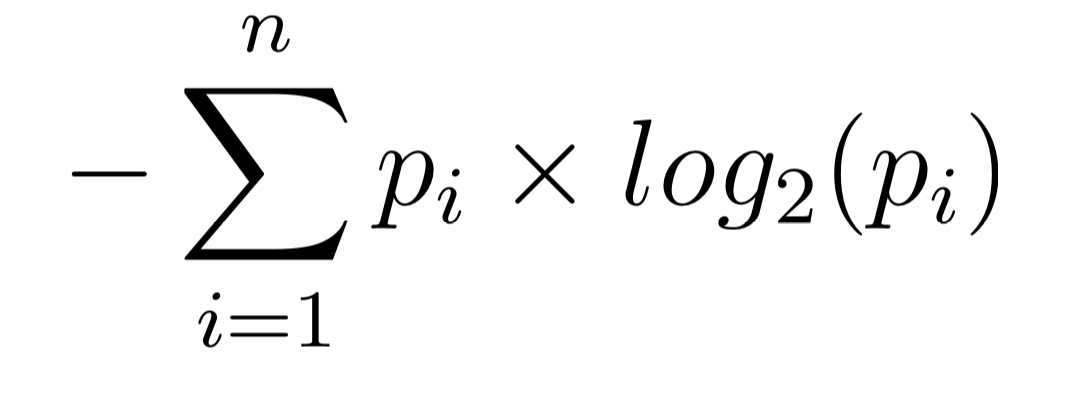

In [57]:
Image('images/16.jpeg')

오버피팅 : 모델이 학습셋에 지나치게 잘 맞도록 합습되어서 새로운 데이터에 대한 예측력이 떨어지는 현상을 의미한다.


언더피팅 : 과소적합이라고도 하며, 모델이 충분히 합습되지 않아 훈련셋에 대해서도 좋은 예측력을 내지 못하는 상황이다. 

너무 과하지도, 부족하지도 않은 모델을 찾아야함. 
이러한 상황을 편향-분산 트레이드오프 bias-variance tradeoff가 있다. 

-1. 편향 : 독립변수와 종속변수를 모델링한 알고리즘이 적절치 못하거나 중요한 부분을 놓쳤을때
-   예) 언더피팅

-2. 분산 : 훈련셋에 있는 데이터의 노이즈에 의해 발생하는 오차
-   예) 오버피팅

분산이 낮으면 편향이 올라가고, 반대로 분산이 높으면 편향이 내려갈 수 밖에 없음. 

8.8 매개변수 튜닝
- 노드 가 많을 수록 오버피팅 발생 가능성 높음. 깊이 제한을 둬야함. 
- depth 기본 값은 none이므로 매개변수를 지정해주지 않으면 깊은 트리 만듬. 

In [58]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)
print('Train score:', accuracy_score(y_train, train_pred), 'Test score:', accuracy_score(y_test, test_pred))


Train score: 0.9780242279474493 Test score: 0.8151712135947177


In [59]:
model = DecisionTreeClassifier(max_depth=5)
model.fit(X_train, y_train)
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)
print('Train score:', accuracy_score(y_train, train_pred), 'Test score:', accuracy_score(y_test, test_pred))


Train score: 0.8540180856509129 Test score: 0.8499769667809797


In [61]:
model = DecisionTreeClassifier(max_depth=7)
model.fit(X_train, y_train)
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)
print('Train score:', accuracy_score(y_train, train_pred), 'Test score:', accuracy_score(y_test, test_pred))

# 7로 했을때가 train , test 모두 최고점 

Train score: 0.8598532673605187 Test score: 0.8541229462046374


8.9 트리 그래프

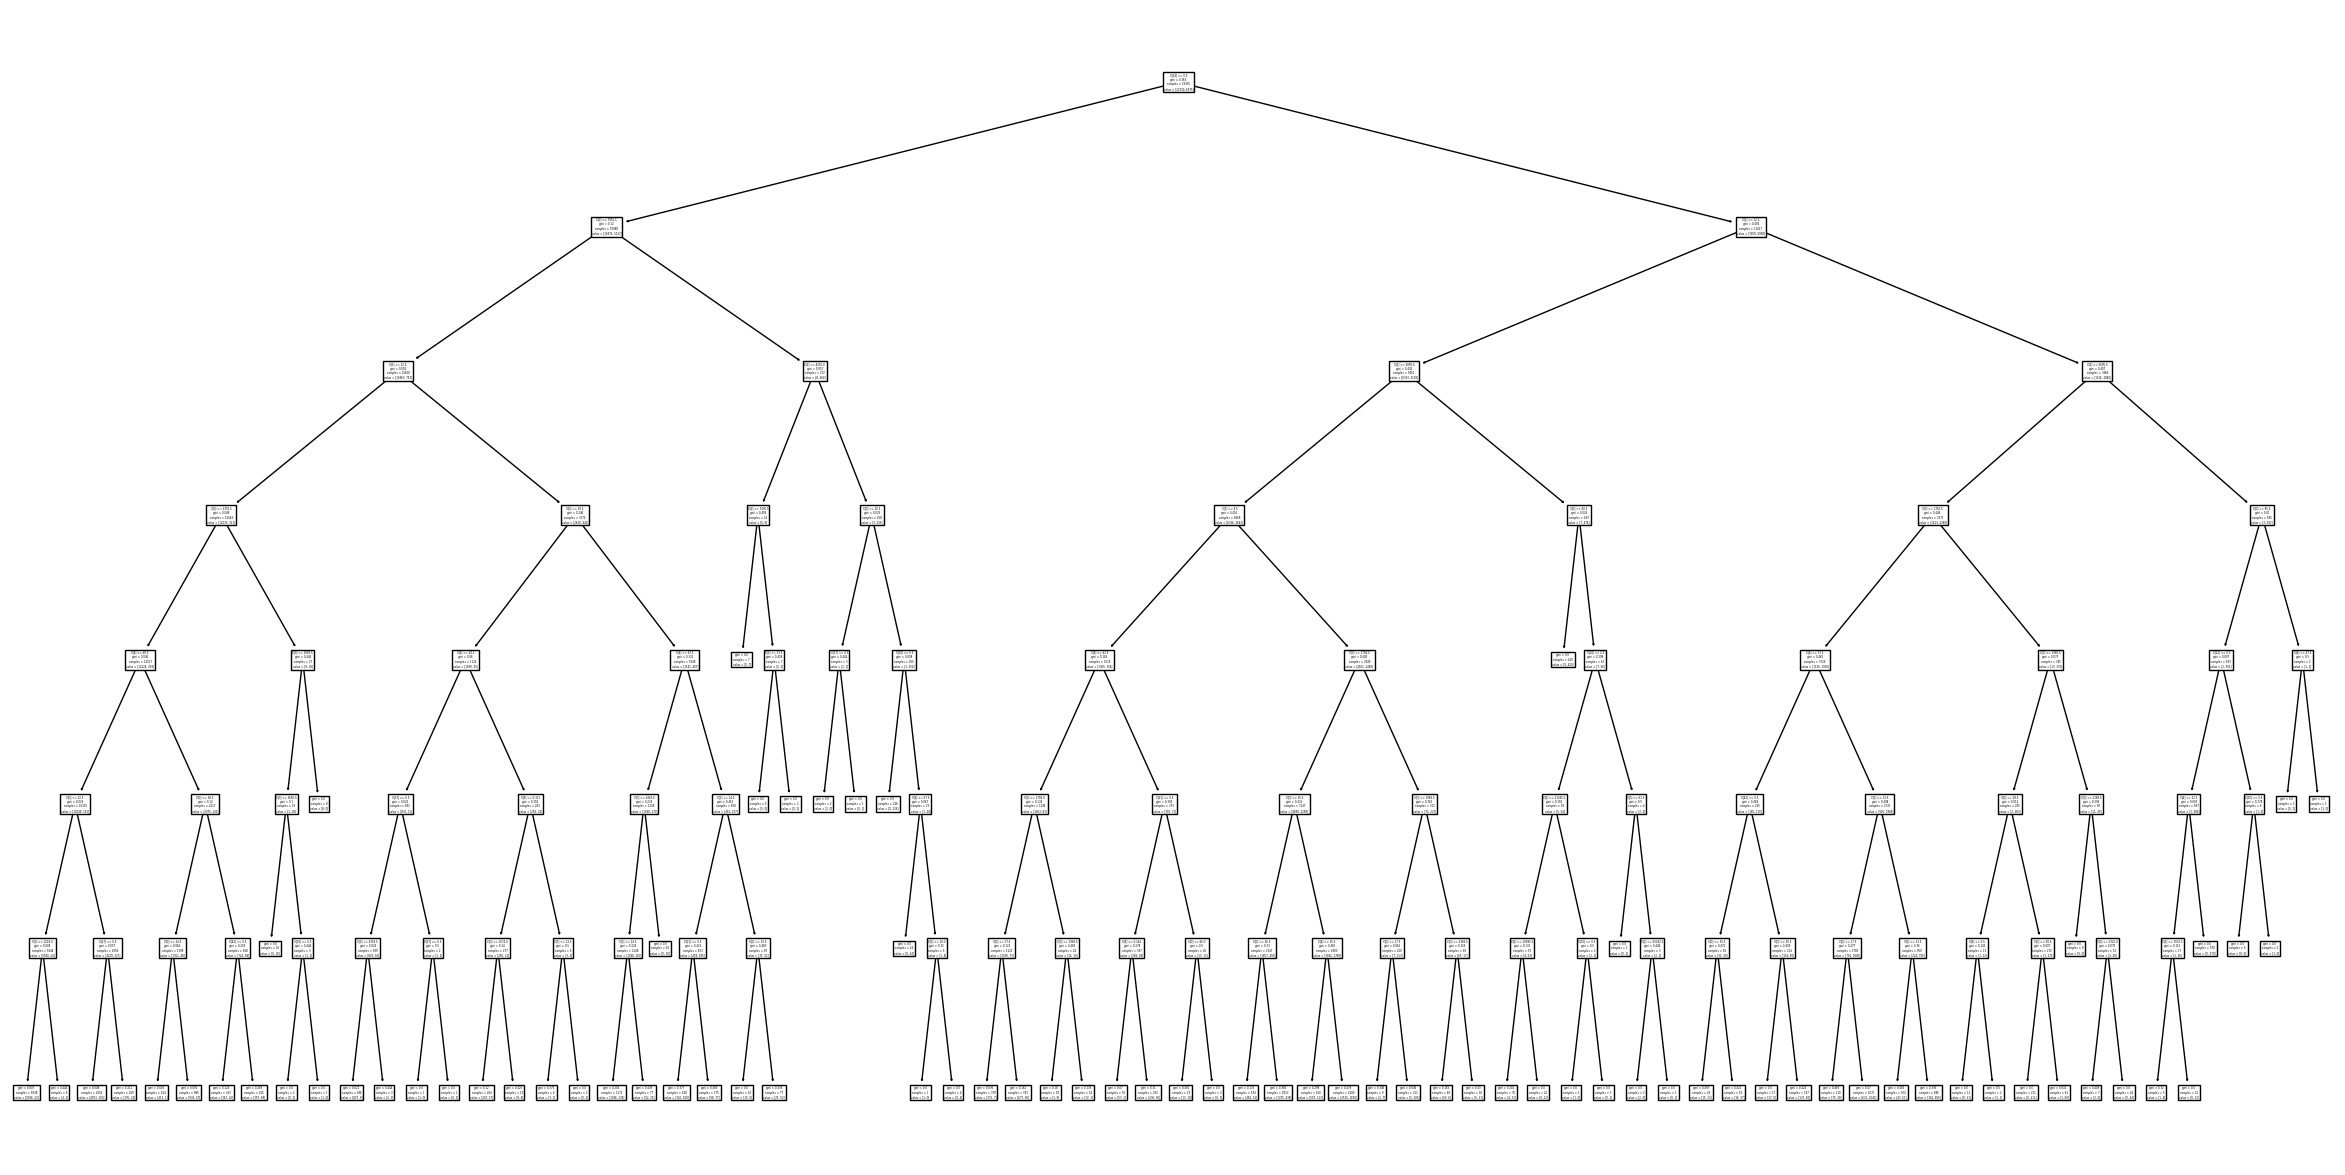

In [62]:
from sklearn.tree import plot_tree
plt.figure(figsize=(30,15)) 
plot_tree(model) 
plt.show() #불필요한 문자가 나오지 않게 출력

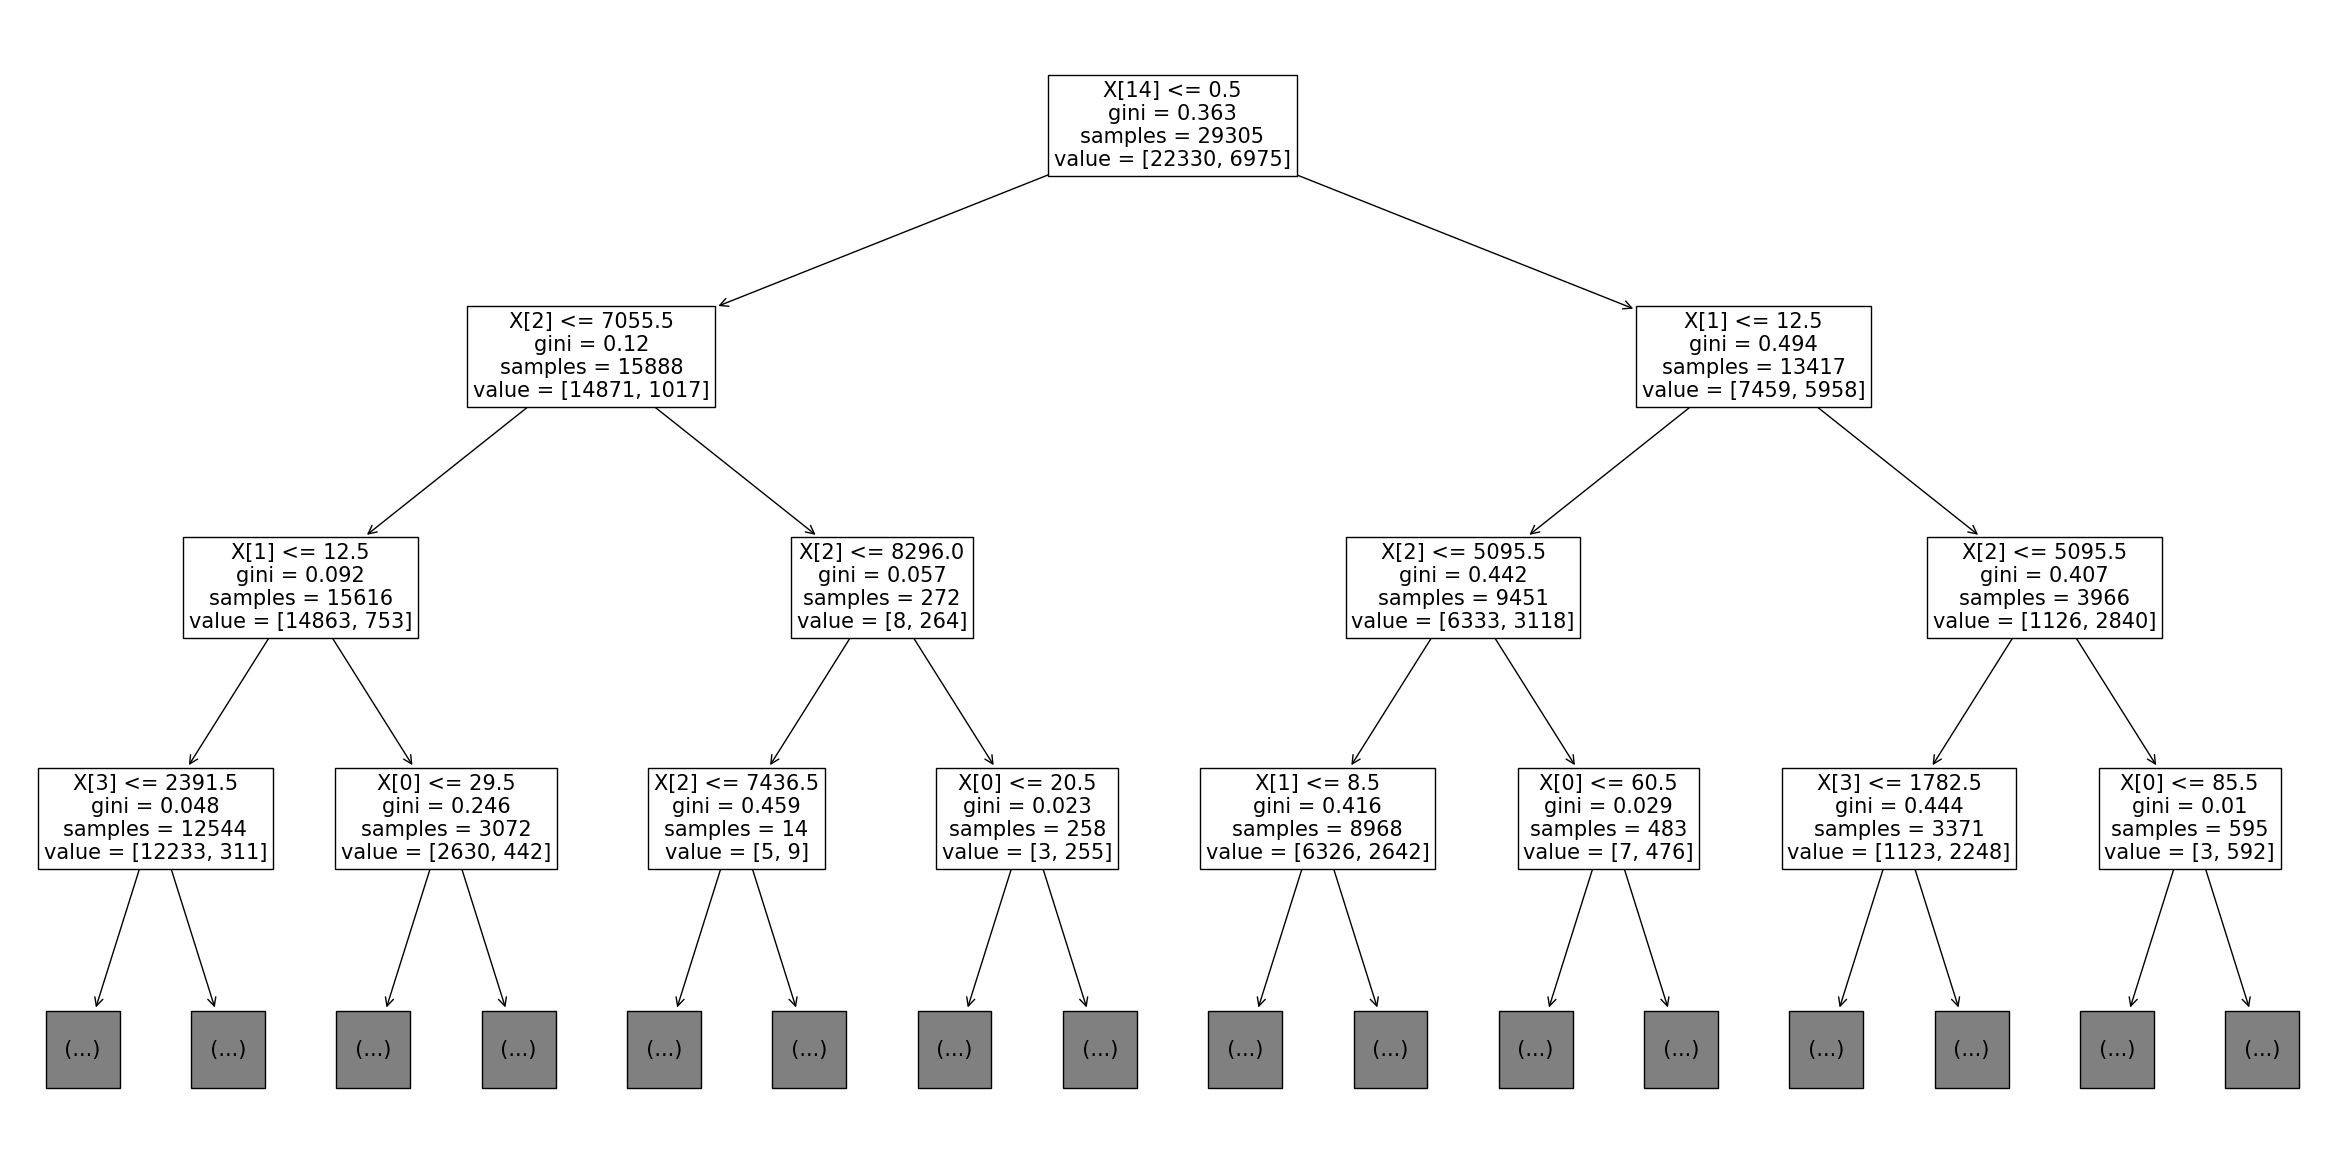

In [63]:
plt.figure(figsize=(30,15)) 
plot_tree(model, max_depth = 3, fontsize=15) #깊이와 폰트 크기 조정
plt.show()

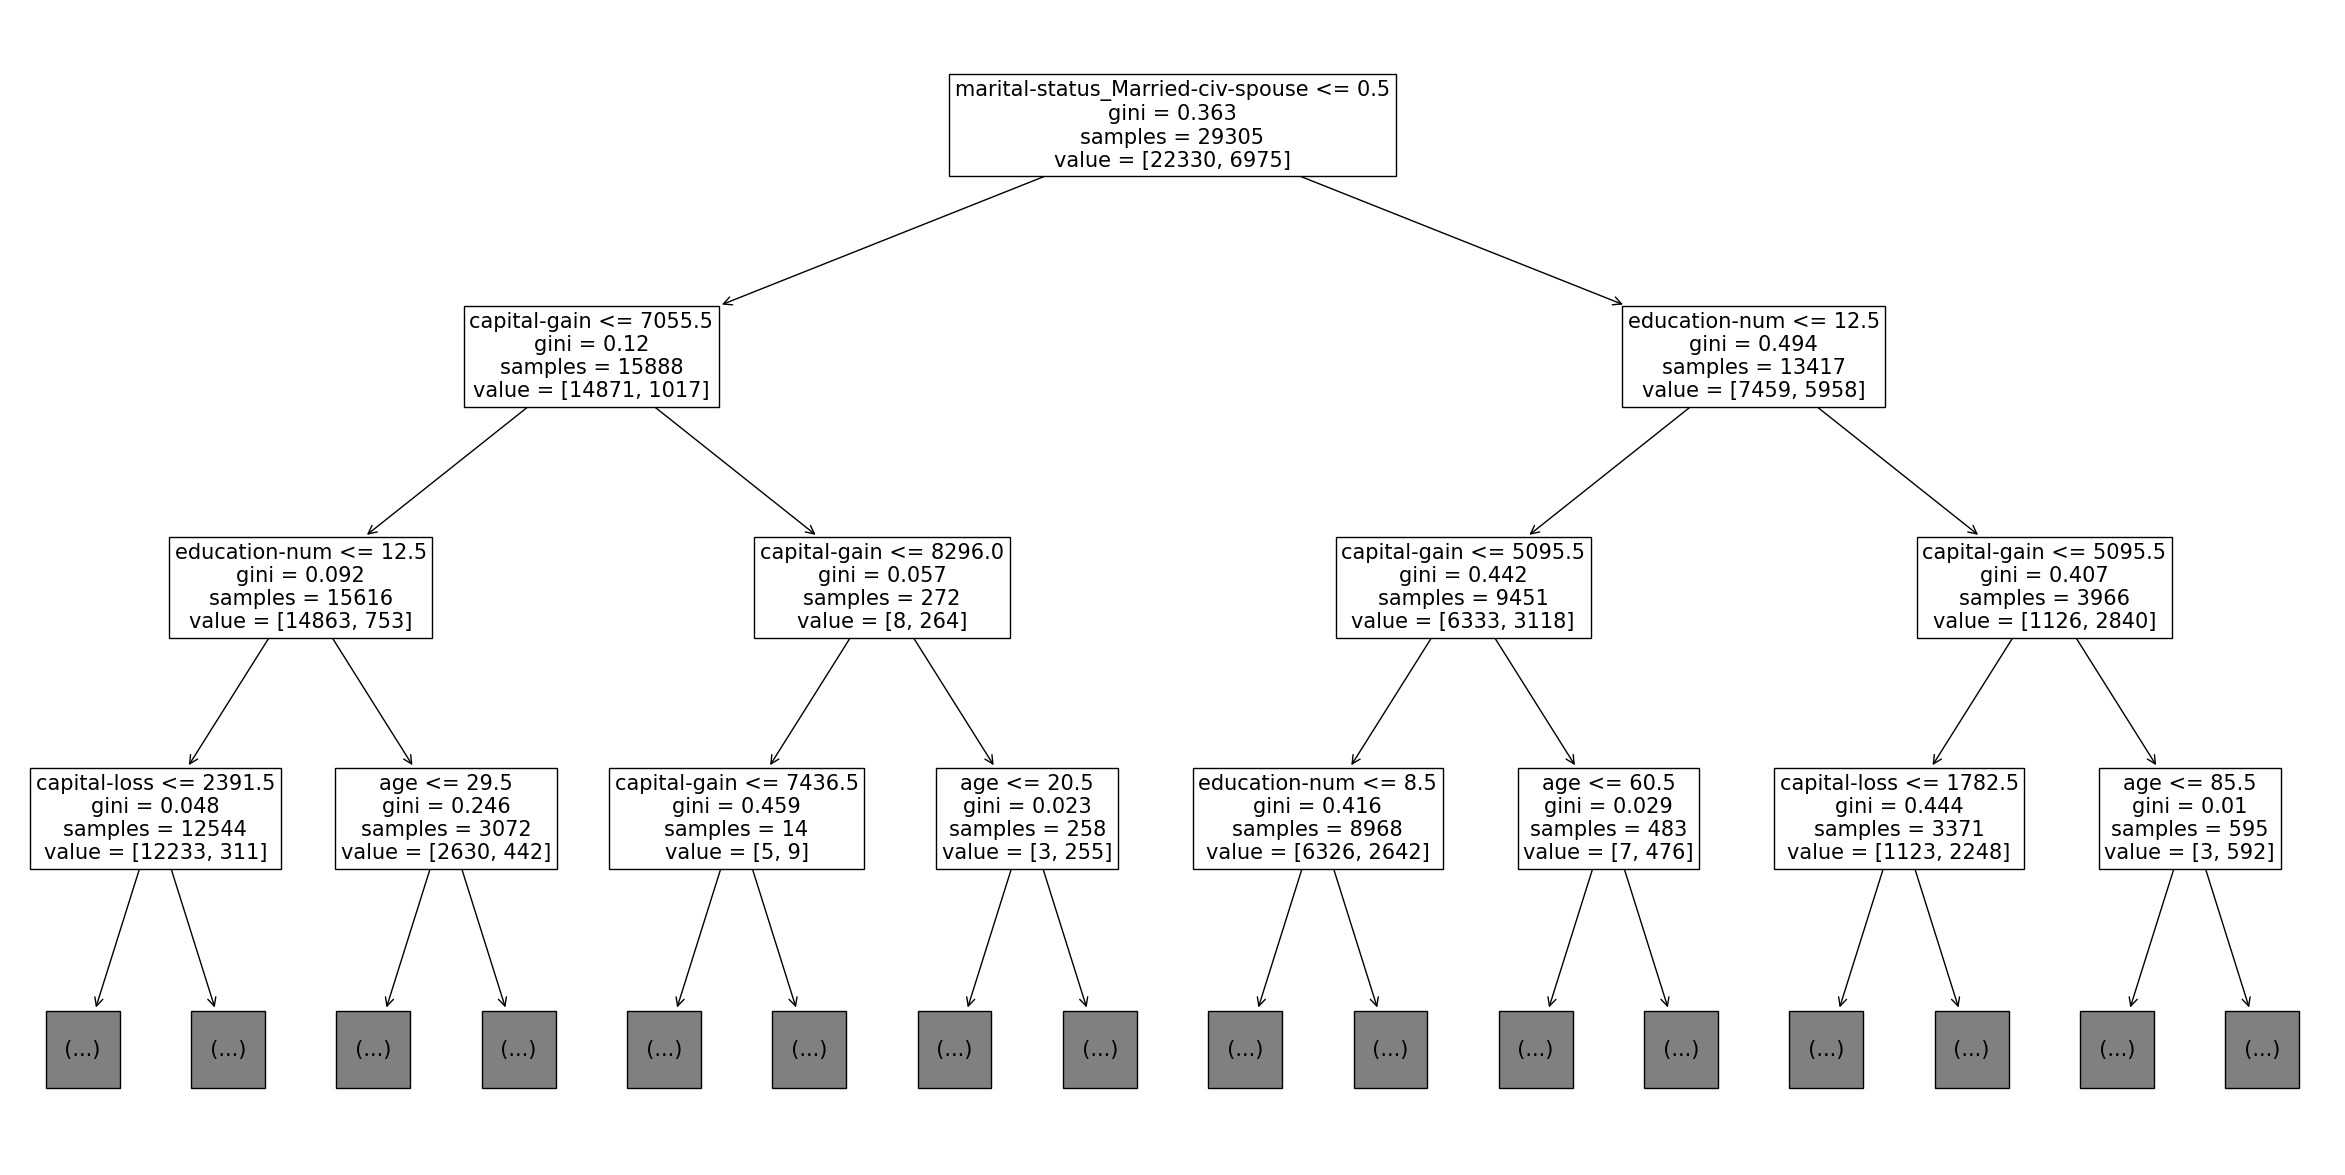

In [64]:
#매개변수를 통해서 원래 변수 이름으로 변경 
plt.figure(figsize=(30,15))
plot_tree(model, max_depth = 3, fontsize=15, feature_names=X_train.columns) # ❶
plt.show()